# One-dimensional Dirac equations visialization using leapfrog scheme
&copy; 2019 Bryce Chudomelka<br>
Modified by Lex Augusteijn in 2021

First some imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")
import imageio
import os
from tqdm import tqdm
import time
import pyglet

Set the path

In [3]:
path = os.getcwd()

path_2d = os.path.join(path, '2D')
path_3d = os.path.join(path, '3D')

def chdir(path):
    if not os.path.isdir(path):
        os.mkdir(path)
    os.chdir(path)

Compute $psi_1$ and $psi_4$ using the leapfrog scheme. Initialize by a Gaussian distribution.

In [4]:
def init(x, sigma):
#     u = np.exp(-(sigma*x)**2/2)*np.prod([np.exp(1j*k*x) for k in range(-100000, 100001)])
    u = np.exp(-(sigma*x)**2/2)
    return u

def build_x(x_min, x_max, dx):
    return np.round(np.arange(x_min, x_max + dx, dx), 8)

def build_t(t_min, t_max, dt):
    dt = round(dt, 8)
    return np.round(np.arange(t_min, t_max + dt, dt), 8)

def LF(t, x, init):
    u = np.zeros(shape=(len(t),len(x)), dtype=np.complex128)
    v = np.zeros(shape=(len(t),len(x)), dtype=np.complex128)
    for tt in tqdm(range(len(t))):
        if tt == 0:
            z = init(x)
            u[tt, :] = z
            v[tt, :] = np.zeros_like(z)
        elif tt == 1:
            u[tt,:] = u[0, :]
            v[tt,:] = v[0, :]
        else:
            for xx in range(len(x)):
                if xx == 0 or xx == len(x) - 1:
                    u[tt, xx] = 0
                    v[tt, xx] = 0
                else:
                    u[tt, xx] = u[tt-2, xx] - l*(v[tt-1, xx+1]-v[tt-1, xx-1])-1j*dt*u[tt-1, xx]
                    v[tt, xx] = v[tt-2, xx] - l*(u[tt-1, xx+1]-u[tt-1, xx-1])+1j*dt*v[tt-1, xx]
    return u, v

Choose some constants and compute the $\psi$'s.

In [5]:
t_min, t_max = 0, 50
x_min, x_max = -50, 50
sigma = 0.2
h, l = 0.1, 0.1
dx, dt = h, np.round(h*l, 8)

x = build_x(x_min, x_max, dx)
t = build_t(t_min, t_max, dt)
print("M: {0}, N:{1}".format(len(x), len(t)))
time.sleep(1)
 
u, v = LF(t, x, lambda x: init(x,sigma))

M: 1001, N:5001


100%|█████████████████████████████████████████████████████████████████████████████| 5001/5001 [00:10<00:00, 479.80it/s]


Plot the $\psi$'s to files or display.

In [6]:
def plot_u_v(zz, count, do_show=False):
    plt.figure(figsize=(10,8))
    plt.plot(x, u[zz,:].real, 'r', label=r'$\psi_1$ R')
    plt.plot(x, u[zz,:].imag, 'r--', label=r'$\psi_1$ I')
    plt.plot(x, v[zz,:].real, 'k', label=r'$\psi_4$ R')
    plt.plot(x, v[zz,:].imag, 'k--', label=r'$\psi_4$ I')
    plt.title('1D Dirac Equation $t=${}, $\sigma=${}'.format(round(t[zz], 4), sigma))
    plt.ylabel(r'$\psi$')
    plt.xlabel(r'$x$')
    plt.grid(alpha=0.618)
    plt.ylim(-ymax,ymax)
    plt.legend()
    if do_show: plt.show()
    else: plt.savefig('G{:03d}'.format(count)+'.png')
    plt.close()

chdir(path_2d)
count = 0
ymax = 1

for zz in tqdm(range(0, len(u[:,0]), 50)):
    plot_u_v(zz, count)
    count += 1

plot_u_v(-1, count)

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:11<00:00,  8.83it/s]


Display a few of them.

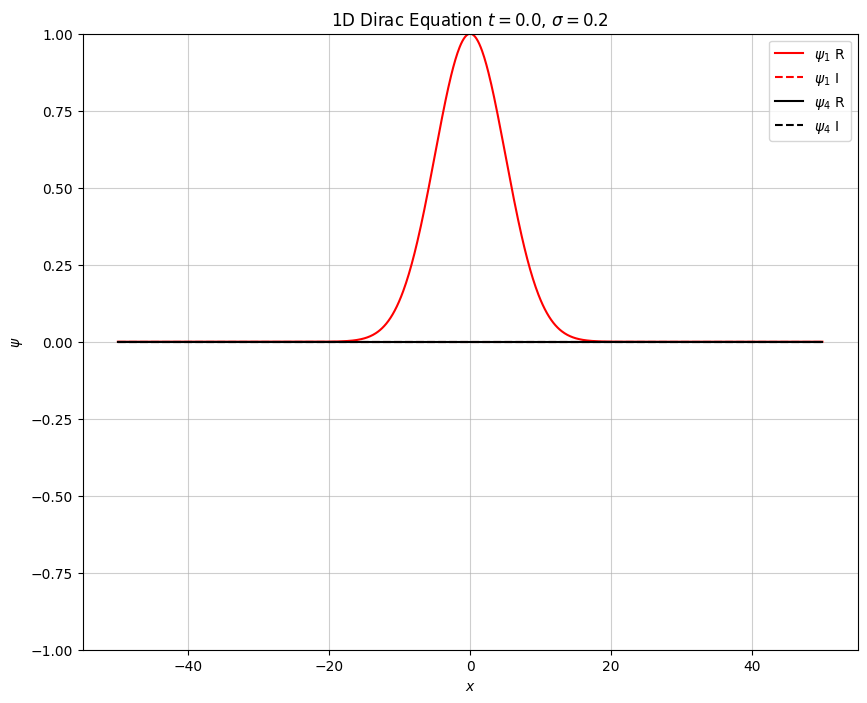

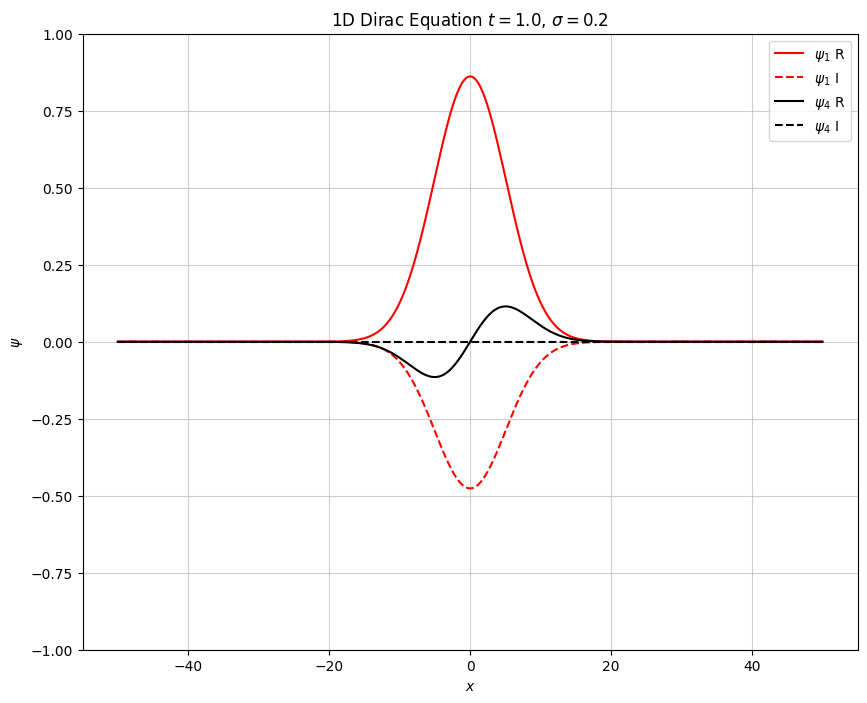

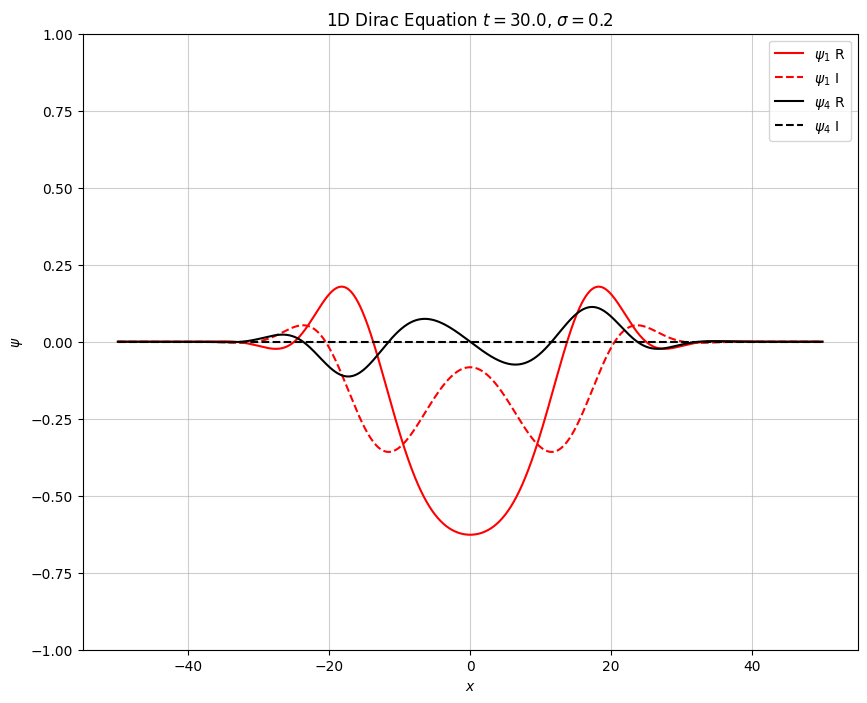

In [7]:
plot_u_v(0, 0, do_show=True)
plot_u_v(100, 0, do_show=True)
plot_u_v(3000, 0, do_show=True)

Compute probability densities and current and write to files.

In [8]:
def P(psi1, psi2):
    return np.conj(psi1)*psi1+np.conj(psi2)*psi2

def J(psi1, psi2):
    return np.conj(psi1)*psi2+np.conj(psi2)*psi1

p = P(u, v)
j = J(u, v)

def plot_p_j(jj, count, do_show=False):
    plt.figure(figsize=(10,8))
    plt.plot(x, j[jj,:], 'b', label='Current')
    plt.plot(x, p[jj,:], 'r', label='Probability Denisty')
    #plt.plot(x, j[jj,:].imag, 'b', label='Current I')
    plt.title('1D Dirac Equation $t=${}, $\sigma=${}'.format(round(t[jj], 4), sigma))
    plt.ylabel(r'Amplitude')
    plt.xlabel(r'$x$')
    plt.grid(alpha=0.618)
    plt.legend()
    plt.ylim(-ymax,ymax)
    if do_show: plt.show()
    else: plt.savefig('H{:03d}'.format(count)+'.png')
    plt.close()

chdir(path_2d)
ymax = 1
count = 0
for jj in tqdm(range(0, len(j[:,0]), 50)):
    plot_p_j(jj, count)
    count += 1

plot_p_j(-1, count)

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:09<00:00, 10.74it/s]


Display a few of them.

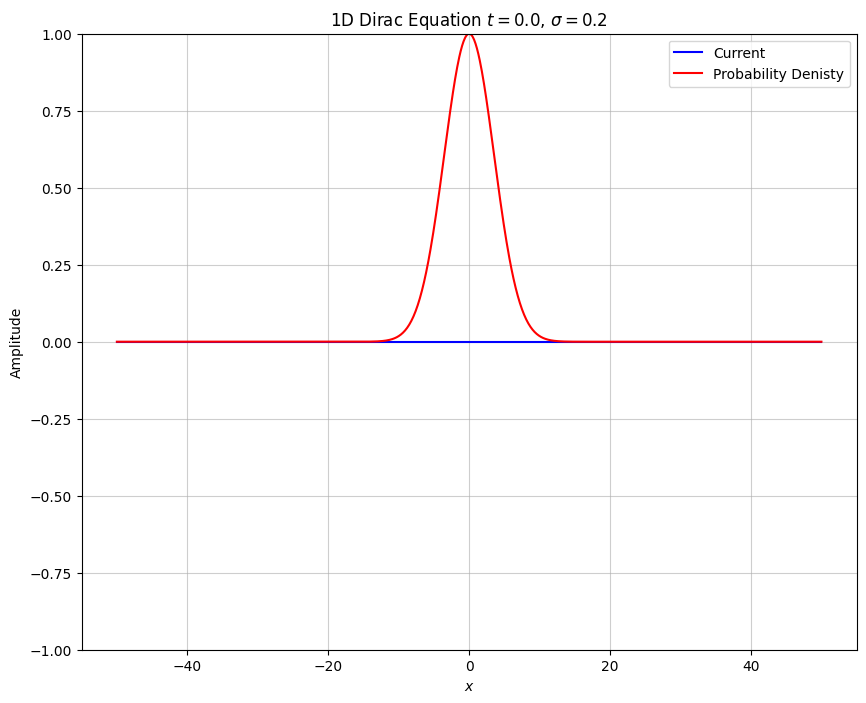

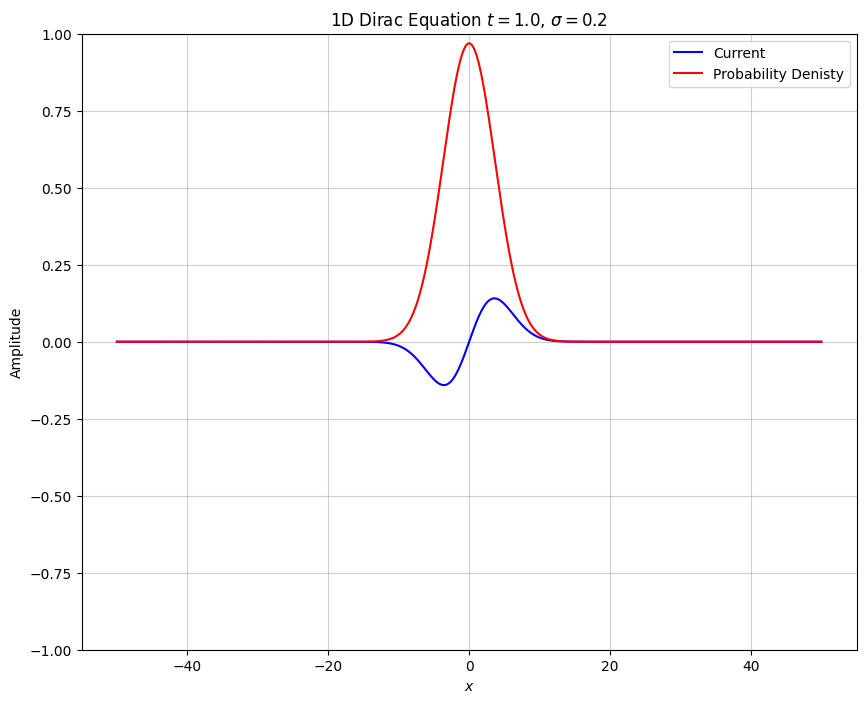

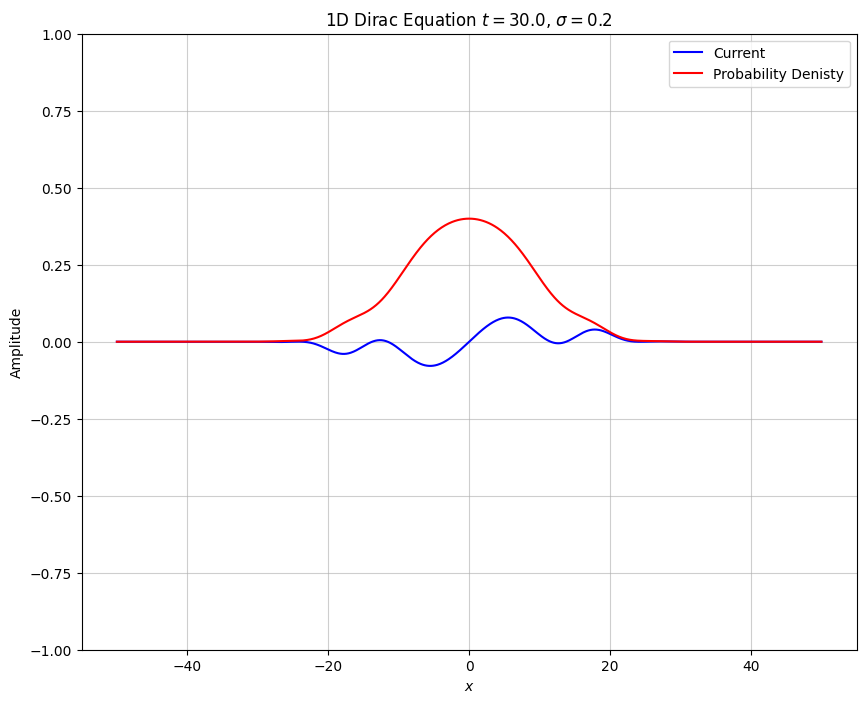

In [9]:
plot_p_j(0, 0, do_show=True)
plot_p_j(100, 0, do_show=True)
plot_p_j(3000, 0, do_show=True)

Generate 3D plots for the $\psi$'s and write them to file

In [10]:
def plot_3d(zz, count = 0, show=False):
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca(projection='3d')
    ax.set_ylim(-ymax,ymax)
    ax.set_zlim(-ymax,ymax)
    ax.view_init(elev=20, azim=70)
    ax.plot(range(len(x)), u[zz,:].imag, u[zz,:].real, label='$psi_1$')
    ax.plot(range(len(x)), v[zz,:].imag, v[zz,:].real, label='$psi_4$')
    plt.title('1D Dirac Equation $t=${}, $\sigma=${}'.format(round(t[zz], 4), sigma))
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'Im($\psi$)')
    ax.set_zlabel(r'Re($\psi$)')
    plt.legend()
    if show: fig.show()
    else: 
        fig.savefig('X{:03d}'.format(count)+'.png')
        plt.close()

chdir(path_3d)
for count, zz in tqdm(enumerate(range(0, len(u[:,0]), 50))):
  plot_3d(zz, count)



101it [00:11,  8.97it/s]


Display a few of them

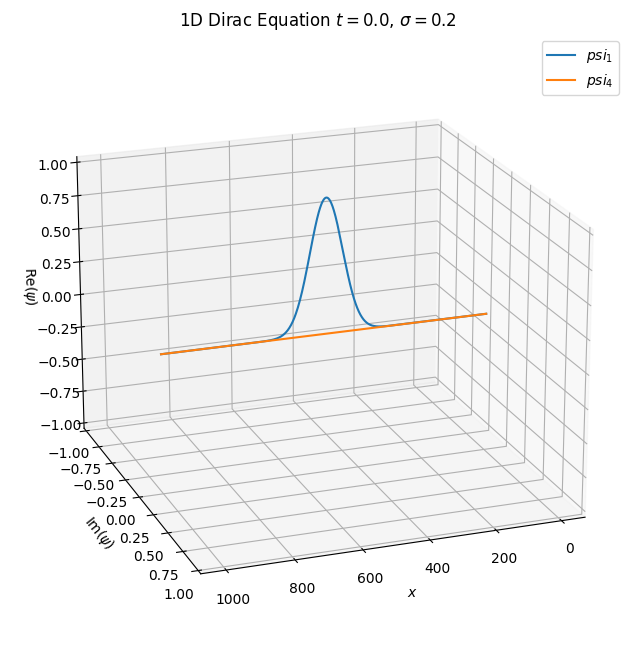

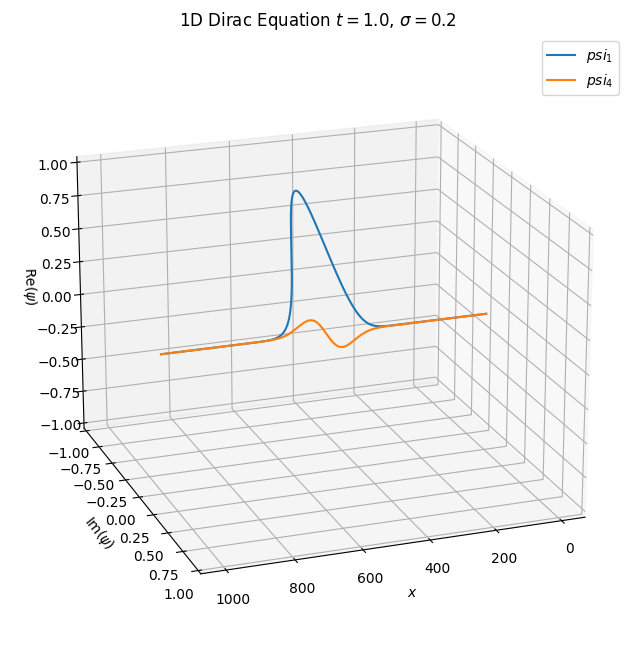

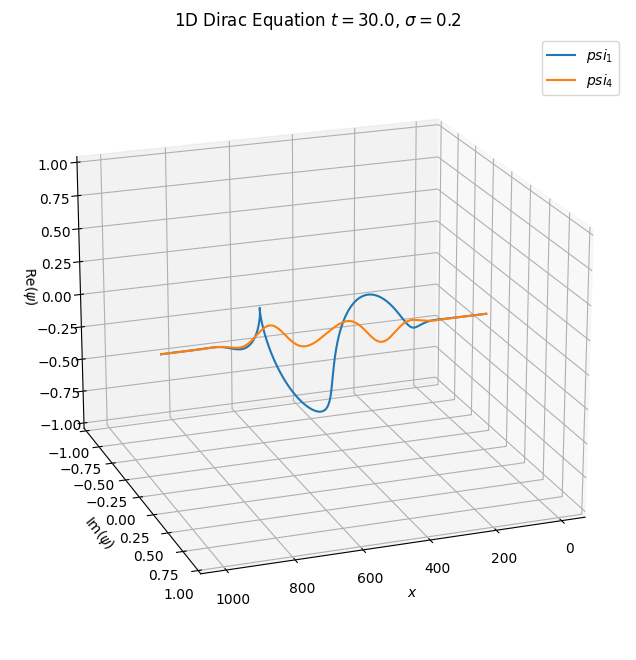

In [11]:
plot_3d(0, show=True)
plot_3d(100, show=True)
plot_3d(3000, show=True)

Generate 3D plot as GIF files

In [12]:

def gen_gif(path, gif_file):
    print("Creating {:s}...".format(gif_file))
    os.chdir(path)
    image_folder = os.fsencode(path)

    filenames = []
    for file in os.listdir(image_folder):
        filename = os.fsdecode(file)
        if filename.endswith(('.png')): #, '.png', '.gif', '.jpg'
            filenames.append(filename)

    filenames.sort()  # this iteration technique has no built in order, so sort the frames

    images = list(map(imageio.imread, filenames))

    # modify the frame duration as needed
    imageio.mimsave(gif_file, images, duration=0.07)  
    print("Done")

gen_gif(path_2d, 'Dirac_2D.gif')
gen_gif(path_3d, 'Dirac_3D.gif')

Creating Dirac_2D.gif...
Done
Creating Dirac_3D.gif...
Done


Display the animated GIFs

In [13]:
def show_gif(path, file):
    chdir(path)
    ag_file = os.path.abspath(os.path.realpath(file))
    animation = pyglet.image.load_animation(file)
    sprite = pyglet.sprite.Sprite(animation)

    # create a window and set it to the image size
    win = pyglet.window.Window(width=sprite.width, height=sprite.height)

    # set window background color = r, g, b, alpha
    # each value goes from 0.0 to 1.0
    green = 0, 1, 0, 1
    pyglet.gl.glClearColor(*green)

    @win.event
    def on_draw():
        win.clear()
        sprite.draw()

    pyglet.app.run()

show_gif(path_2d, 'Dirac_2D.gif')
show_gif(path_3d, 'Dirac_3D.gif')